# Histogram2D Artist

In this example notebook, we show how to create a histogram 2D plot using the `Histogram2D` class. The `Histogram2D` class is a subclass of the `Artist` class. It has a simplified interface for creating histogram 2D plots and updating some of its properties, like assigning different classes to underlying points and displaying bins/patches with different colors based on a overlay colormap.

It can be imported like shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biaplotter.artists import Histogram2D

np.random.seed(2)

## Creating a Histogram 2D Plot


To create an empty histogram 2D plot, just instanciate the `Histogram2D` class and provide an axes object as an argument.

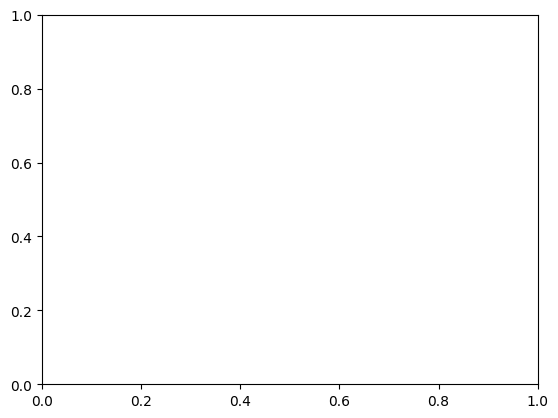

In [2]:
fig, ax = plt.subplots()
histogram = Histogram2D(ax)

## Adding Data to the Histogram 2D Artist


To add data to the histogram 2D plot, just feed the property `data` with a (N, 2) shaped numpy array. The plot gets updated automatically every time one of its properties is changed. Below, we have a small function to generate 2 gaussian distributions with different means and standard deviations.

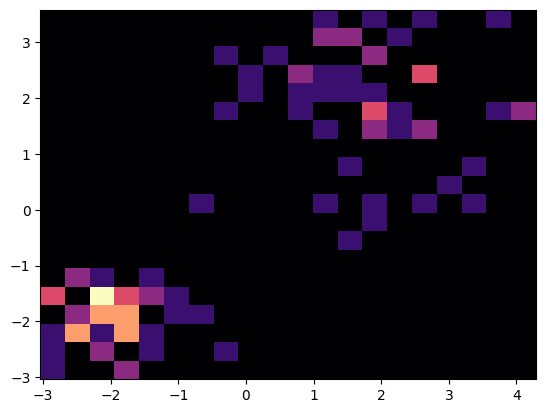

In [3]:
n_samples = 100

def generate_gaussian_data(n_samples):
    """Generate a 2D dataset with two Gaussian clusters."""
    # Gaussian 1
    x1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    y1 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    # Gaussian 2
    x2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    y2 = np.random.normal(loc=-2, scale=0.5, size=n_samples//2)
    x_data = np.concatenate([x1, x2])
    y_data = np.concatenate([y1, y2])
    return np.vstack([x_data, y_data]).T

data = generate_gaussian_data(n_samples)
histogram.data = data
fig # show the updated figure

## Assigning Classes to Data Points


The `Histogram2D` artist comes with a custom categorical overlay colormap, which can be used to assign different classes to underlying points and display the bins/patches with the corresponding class color as an overlay. You can access the histogram current categorical colormap via `overlay_colormap` attribute.

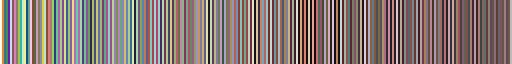

In [4]:
histogram.overlay_colormap

To assign classes to underlying points, just feed the property `color_indices` with a (N,) shaped numpy array containing integers. These integers will be used as indices to the colormap.

`Histogram2D` has a convenience method called `indices_in_patches_above_threshold`, which finds histogram patches where counts are above threshold and returns the indices of the points belonging to those patches.

Below, we define two different thresholds and get the indices of points that fall in those patches. We assign classes `1` and `2` to those indices and feed this array to `color_indices`.

*Note that class `0` represents the background, thus, `color_indices` `0` are transparent for the histogram.*

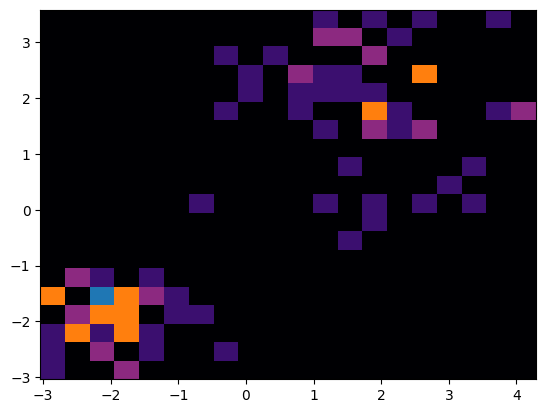

In [5]:
threshold_1 = 2
threshold_2 = 4

indices_in_patches_above_threshold_1 = histogram.indices_in_patches_above_threshold(threshold_1)
indices_in_patches_above_threshold_2 = histogram.indices_in_patches_above_threshold(threshold_2)

color_indices = np.zeros(n_samples, dtype=int)
color_indices[indices_in_patches_above_threshold_1] = 1
color_indices[indices_in_patches_above_threshold_2] = 2


histogram.color_indices = color_indices
fig

In [6]:
print("Histogram color_indices:\n", histogram.color_indices)

Histogram color_indices:
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 2 0 0 1 0 0 0 2 1 0 1 2 0 0 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 1 1 2 0 0 1 1 1 1 2 0 0 0 0 0 1 1 1]


If new data of a different size is added, the previous data values are overwritten and the respective `color_indices` are reset to all zeros. This makes sure that the `color_indices` are always in snc with the amount of data in the plot.

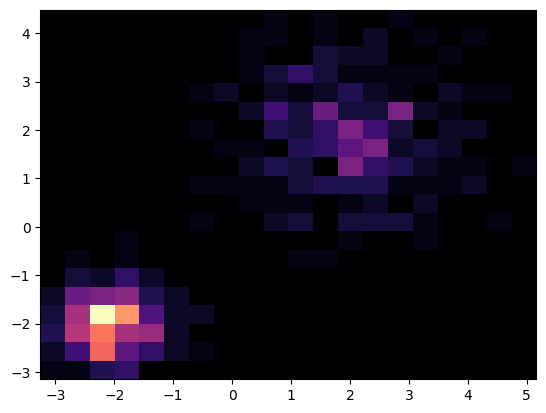

In [7]:
# Adding 400 more samples
n_samples = 400
data = np.concatenate([data, generate_gaussian_data(n_samples)])

histogram.data = data
fig

In [8]:
print("Histogram color_indices (up to 100th index):\n", histogram.color_indices[:100])

Histogram color_indices (up to 100th index):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


If you want to clear an existing, non-zero array of `color_indices` (i.e., an histogram overlay) we can reset colors by setting `color_indices` to `0` (default) or `np.nan`.

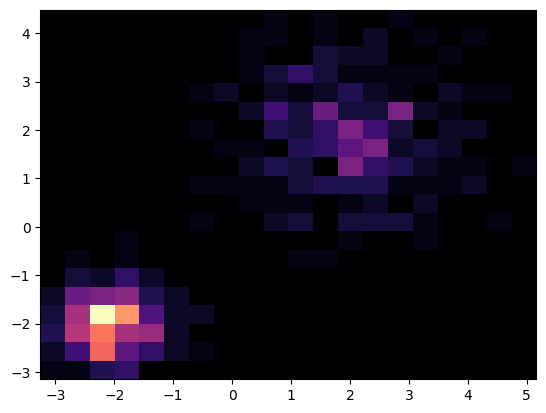

In [9]:
histogram.color_indices = 0
fig

## Properties


### Histogram Colormap

You can change the histogram colormap by setting the `histogram_colormap` attribute. Below, we show the default histogram colormap, which is `magma`.

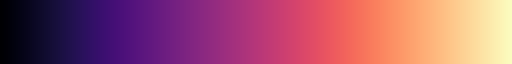

In [10]:
histogram.histogram_colormap

Here we display another colormap from matplotlib (`viridis`) and assign it to the histogram.

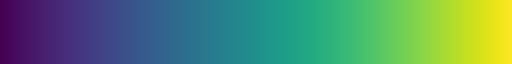

In [11]:
plt.cm.viridis

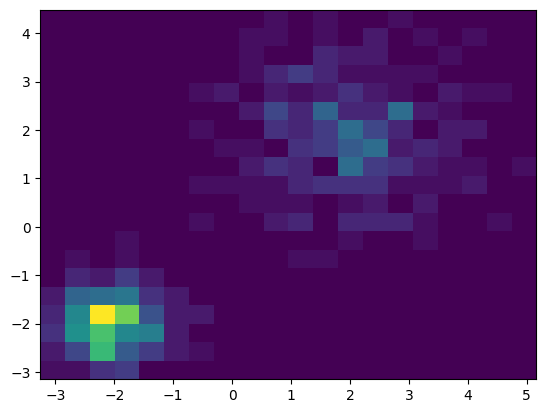

In [12]:
histogram.histogram_colormap = plt.cm.viridis
fig

### Histogram Color Normalization

You can change the histogram color normalization by setting the `histogram_color_normalization_method` attribute. Below, we show the default color normalization, which is `linear`, by `log`. This is useful for visualizing data with a wide range of values.

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists_base.py:248: UserWarning: Log normalization applied to color indices with min value 0.01. Values below 0.01 were set to 0.01.
  warnings.warn(


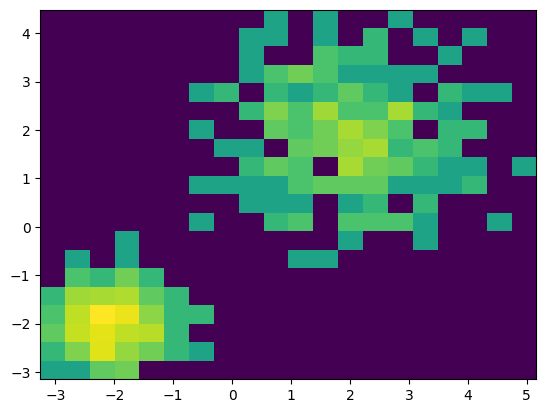

In [13]:
histogram.histogram_color_normalization_method = 'log'
fig

### Histogram Interpolation

You can change the histogram interpolation by setting the `histogram_interpolation` attribute. Below, we replace the default interpolation, which is `nearest`, by `bilinear`.

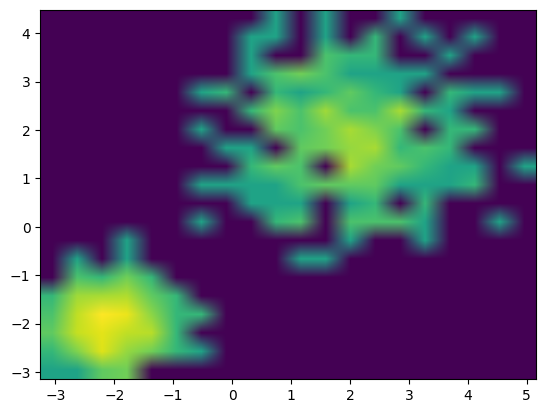

In [14]:
histogram.histogram_interpolation = 'bilinear'
fig

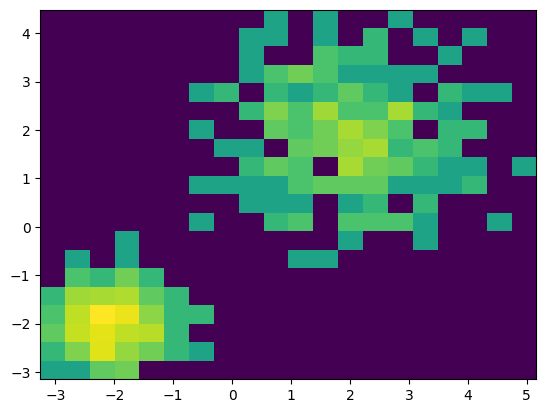

In [15]:
histogram.histogram_interpolation = 'nearest'
fig

### Histogram Bins

You can set the number of bins in the histogram by setting the `bins` attribute. The default number of bins is 20.

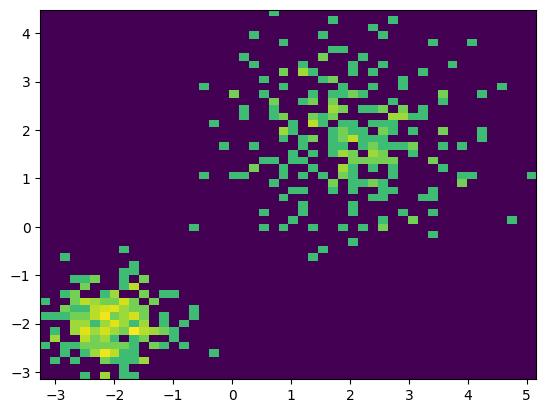

In [16]:
histogram.bins = 50
fig

## Histogram Minimum Count

You can choose a minimum count value for the histogram by setting the `cmin` attribute. The default value is 0. This will make patches with counts below this value transparent and shift the histogram colormap visualization accordingly.

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists_base.py:248: UserWarning: Log normalization applied to color indices with min value 1.0. Values below 0.01 were set to 0.01.
  warnings.warn(


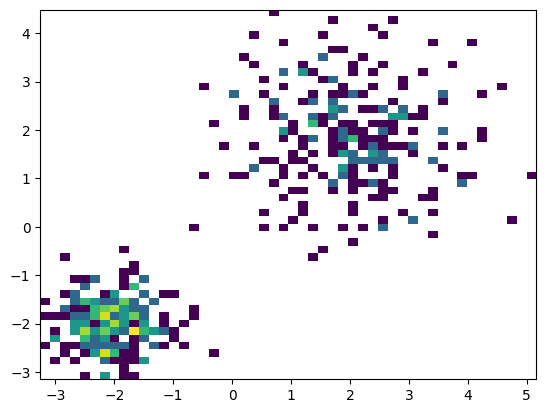

In [17]:
histogram.cmin = 1
fig

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists_base.py:248: UserWarning: Log normalization applied to color indices with min value 0.01. Values below 0.01 were set to 0.01.
  warnings.warn(


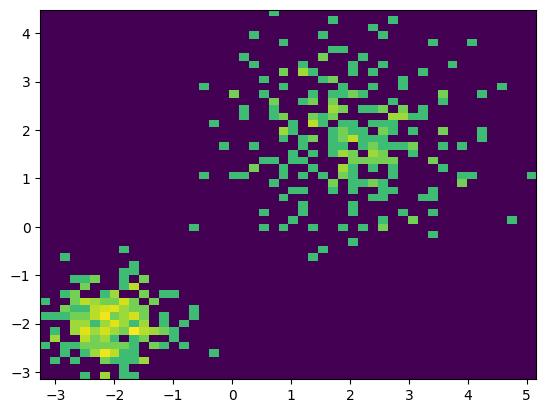

In [18]:
histogram.cmin = 0
fig

## Assigning a Feature as an Overlay


You can assign a feature to be displayed as an overlay on the histogram. This feature can be a continuous or categorical feature.
Let's assign the x coordinate as an overlay and use a different colormap ('jet') to display it.

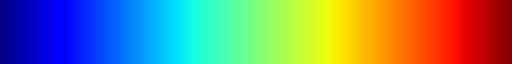

In [19]:
plt.cm.jet

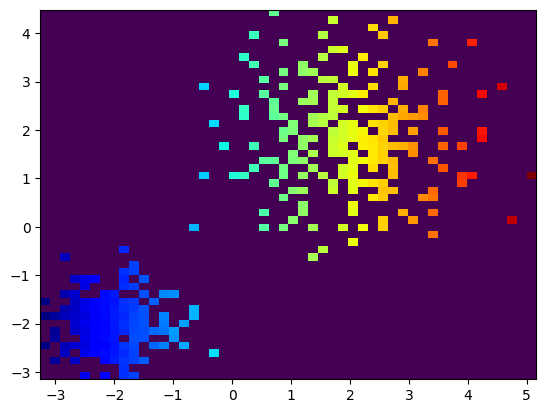

In [20]:
feature = data[:, 0] # x coordinates
histogram.overlay_colormap = plt.cm.jet
histogram.color_indices = feature
fig

Of course now we lose the histogram count information, but we can edit the overlay opacity or visibility to better see the original histogram again.

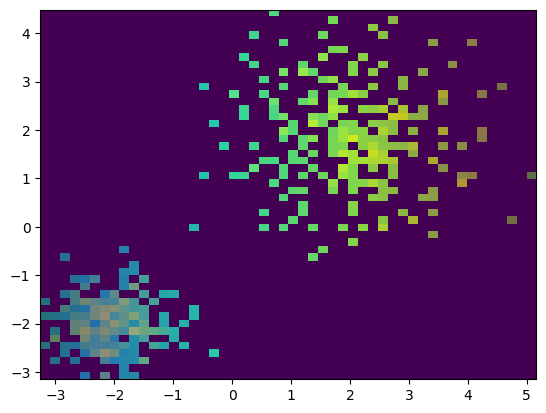

In [21]:
histogram.overlay_opacity = 0.4
fig

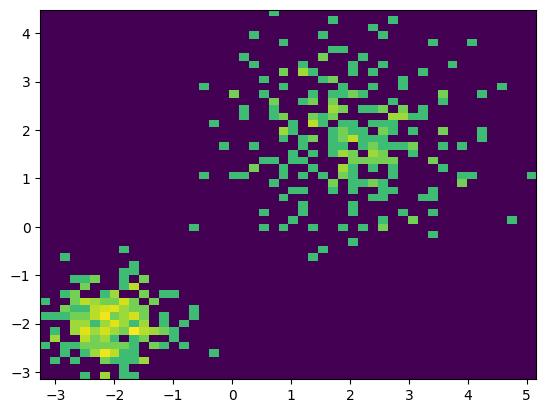

In [22]:
histogram.overlay_visible = False
fig

Here we restore the defualt overlay opacity and visibility.

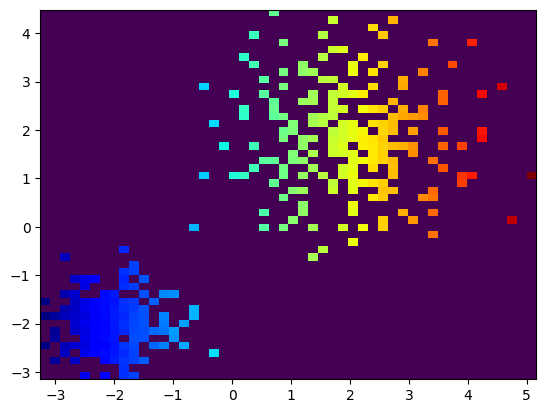

In [23]:
histogram.overlay_opacity = 1
histogram.overlay_visible = True
fig

We can also apply other color normalization method and interpolation to the overlay. Below, we change the overlay normalization to `symlog` and the interpolation to `bilinear`.

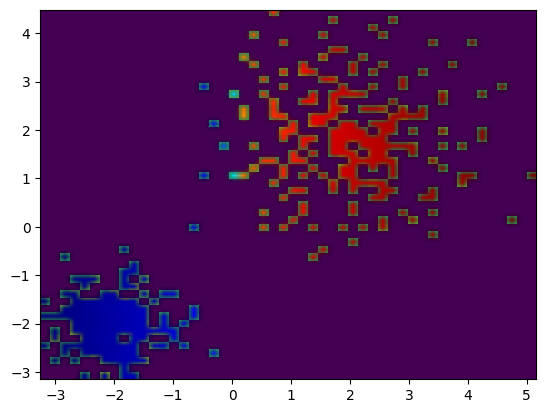

In [24]:
histogram.overlay_color_normalization_method = 'symlog'
histogram.overlay_interpolation = 'bilinear'
fig

Again, we can clear the overlay again by setting `color_indices` to `np.nan`.

c:\Users\mazo260d\miniforge3\envs\biaplotter\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1437: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


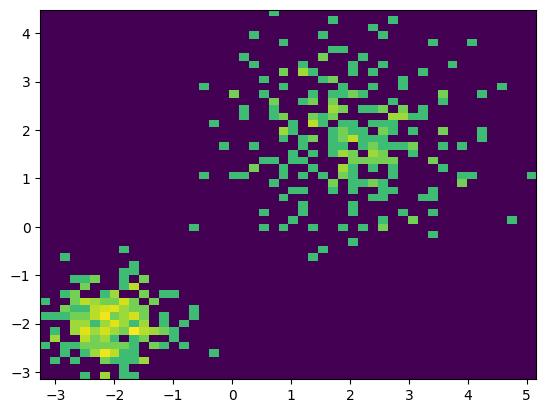

In [25]:
histogram.color_indices = np.nan
fig

## Histogram Visibility

Optionally, hide/show the artist by setting the `visible` attribute.

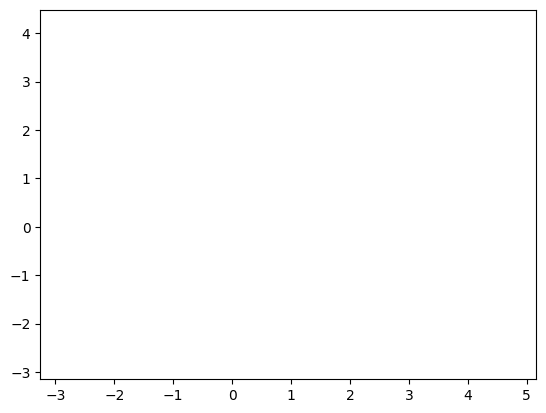

In [26]:
histogram.visible = False
fig

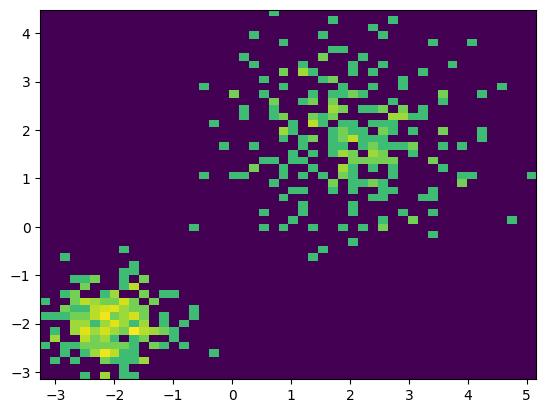

In [27]:
histogram.visible = True
fig

## Resetting the Histogram2D Artist

The `Histogram2D` artist can be reset to its default state by calling the `reset()` method. This will remove all data and properties set on the artist, and it will be ready to accept new data.

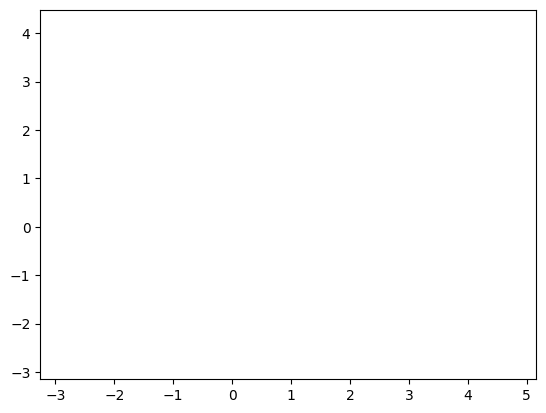

In [28]:
histogram.reset()
fig